## **Import libraries**

In [54]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from countrygroups import EUROPEAN_UNION
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale 
scaler = StandardScaler()

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

## **Download Data**

In [3]:
# Read the data
energy_data = pd.read_csv('global-data-on-sustainable-energy.csv')

## **Dataset description**

The dataset showcases sustainable energy indicators and other useful factors across all countries from 2000 to 2020.

[**Sustainable Energy**](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy)

**Entity** - the name of the country or region for which the data is reported

**Year** - the year for which the data is reported, ranging from 2000 to 2020

**Access to electricity (% of population)** - the percentage of population with access to electricity

**Access to clean fuels for cooking (% of population)** - the percentage of the population with primary reliance on clean fuels

**Renewable-electricity-generating-capacity-per-capita** - installed renewable energy capacity per person

**Financial flows to developing countries (US $)** - aid and assistance from developed countries for clean energy projects

**Renewable energy share in total final energy consumption (%)** - percentage of renewable energy in final energy consumption

**Electricity from fossil fuels (TWh)** - electricity generated from fossil fuels (coal, oil, gas) in terawatt-hours

**Electricity from nuclear (TWh)** - electricity generated from nuclear power in terawatt-hours

**Electricity from renewables (TWh)** - electricity generated from renewable sources (hydro, solar, wind, etc.) in terawatt-hours

**Low-carbon electricity (% electricity)** - percentage of electricity from low-carbon sources (nuclear and renewables)

**Primary energy consumption per capita (kWh/person)** - energy consumption per person in kilowatt-hours

**Energy intensity level of primary energy (MJ/$2011 PPP GDP)** - energy use per unit of GDP at purchasing power parity

**Value_co2_emissions (metric tons per capita)** - carbon dioxide emissions per person in metric tons

**Renewables (% equivalent primary energy)** - equivalent primary energy that is derived from renewable sources

**GDP growth (annual %)** - annual GDP growth rate based on constant local currency

**GDP per capita** - gross domestic product per person

**Density (P/Km2)** - population density in persons per square kilometer

**Land Area (Km2)** - total land area in square kilometers

**Latitude** - latitude of the country's centroid in decimal degrees

**Longitude** - longitude of the country's centroid in decimal degrees

## **Problem statement**

- analyze the world market of renewable energy

- analyze carbon dioxide emissions in different countries

- closely focus on the European Union's energy market

- identify countries for potential investment in green technologies

- create an online Streamlit dashboard

- create machine learning models to predict the amount of CO2 emissions per capita


## **Questions covered in the dataset analysis:**

1. What are top 10 countries by the amount of electricity generated from renewable sources in 2000 and 2020?

2. A heatmap for the correlation matrix of all numerical variables. What correlations can be seen?

3. What is the distribution of renewable energy share in countries on each continent?

4. CO2 emissions per capita vs. GDP per capita in 2019. What insights can be observed from it?

5. Distribution of the amount of renewable energy produced in European Union countries in 2020. Which countries lack renewable energy production?

6. Dynamics of electricity generation in the European Union from 2000 to 2020. What information does it reveal?

7. Energy intensity level of primary energy vs. renewable energy share in power generation in the EU in 2019. Which countries consume the energy more efficiently?

In [4]:
energy_data.dtypes

Entity                                                               object
Year                                                                  int64
Access to electricity (% of population)                             float64
Access to clean fuels for cooking                                   float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial flows to developing countries (US $)                      float64
Renewable energy share in the total final energy consumption (%)    float64
Electricity from fossil fuels (TWh)                                 float64
Electricity from nuclear (TWh)                                      float64
Electricity from renewables (TWh)                                   float64
Low-carbon electricity (% electricity)                              float64
Primary energy consumption per capita (kWh/person)                  float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         float64
Value_co2_em

In [5]:
pd.set_option('display.max_columns', None)
energy_data.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


## **Data Cleaning**

- change column names because they are too long

- check the dataset for any missing values and duplicates

- change data types to a right format

- add extra columns useful for analysis

In [6]:
# Changing column names
energy_data.columns = [
    "country",                    # the name of the country or region
    "year",                       # the year for which the data is reported, ranging from 2000 to 2020
    "electricity_access",         # access to electricity (% of population)
    "clean_cooking",              # access to clean fuels for cooking (% of population)
    "renewable_capacity",         # renewable electricity generating capacity per capita
    "financial_flows",            # financial flows to developing countries (US $)
    "renewable_share",            # renewable energy share in total final energy consumption (%)
    "fossil_electricity",         # electricity from fossil fuels (TWh)
    "nuclear_electricity",        # electricity from nuclear (TWh)
    "renewable_electricity",      # electricity from renewables (TWh)
    "low_carbon_electricity",     # percentage of electricity from low-carbon sources (nuclear and renewables)
    "energy_consumption",         # primary energy consumption per capita (kWh/person)
    "energy_intensity",           # energy intensity level of primary energy (MJ/$2011 PPP GDP)
    "co2_emissions",              # carbon dioxide emissions per person (metric tons per capita)
    "renewables",                 # equivalent primary energy that is derived from renewable sources (%)
    "gdp_growth",                 # annual GDP growth rate based on constant local currency (%)
    "gdp_per_capita",             # gross domestic product per person
    "density",                    # population density in persons per square kilometer
    "land_area",                  # total land area in square kilometers
    "latitude",                   # latitude of the country's centroid in decimal degrees
    "longitude"                   # longitude of the country's centroid in decimal degrees
]

In [7]:
# Check for missing values
energy_data.isna().sum()

country                      0
year                         0
electricity_access          10
clean_cooking              169
renewable_capacity         931
financial_flows           2089
renewable_share            194
fossil_electricity          21
nuclear_electricity        126
renewable_electricity       21
low_carbon_electricity      42
energy_consumption           0
energy_intensity           207
co2_emissions              428
renewables                2137
gdp_growth                 317
gdp_per_capita             282
density                      1
land_area                    1
latitude                     1
longitude                    1
dtype: int64

In [8]:
# Check for any duplicate rows in the dataset
energy_data.duplicated().any()

False

In [9]:
# Convert density column to float
energy_data['density'] = energy_data['density'].str.replace(",", "").astype(float)

# Convert country column to string
energy_data['country'] = energy_data['country'].astype('string')

In [10]:
# Add columns of country's population and co2 emissions per capita
energy_data['population'] = energy_data['density'] * energy_data['land_area']
energy_data['co2_per_capita'] = energy_data['co2_emissions'] / energy_data['population'] * 1000

## **Exploratory Data Analysis**

### 1. What are top 10 countries by the amount of electricity generated from renewable sources in 2000 and 2020?

In [11]:
# Top 10 countries by renewable energy generation in 2000 and 2020

# Filter data
energy_data_2000 = energy_data.loc[(energy_data['year'] == 2000)].sort_values(by='renewable_electricity', ascending = False).reset_index(drop=True)
energy_data_2020 = energy_data.loc[(energy_data['year'] == 2020)].sort_values(by='renewable_electricity', ascending = False).reset_index(drop=True)

# Plot top 10 countries - barplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("2000", "2020"))

fig.add_trace(go.Bar(x=energy_data_2000['country'][:10],
                     y=energy_data_2000['renewable_electricity'],
                     marker=dict(color = energy_data_2000['renewable_electricity'],
                     colorscale='agsunset'),
                     name = '2000'),
              row=1, col=1)

fig.add_trace(go.Bar(x=energy_data_2020['country'][:10],
                     y=energy_data_2020['renewable_electricity'],
                     marker=dict(color = energy_data_2020['renewable_electricity'],
                     colorscale='agsunset'),
                     name = '2020'),
              row=1, col=2)

fig.update_layout(showlegend=False,
                  title_text = 'Top 10 countries by renewable energy generation', title_x=0.5,
                  yaxis_title='Electricity from renewables (TWh)')
fig.show()

The bar charts illustrate the top 10 countries by the amount of electricity generated from renewable sources in 2000 and 2020.

- In the year 2000, **Canada** was the leader in renewable energy production constituting 363.7 TWh of energy. **The United States** were the 2nd largest producer with 350.93 Twh.

- By 2020, **China** became the top 1 country in renewable energy production, and the amount of electricity produced from renewable cources was almost 10 times more than in 2000 and constituted 2185 TWh.**The US** were again the 2nd largest producer, the amount of renewable energy increased 2.3 times and equaled 821.4 TWh, but was far less compared to China. In **Canada**, the amount rose by around 20% and the country was 4th largest.

- One can notice the renewable energy production in **India** increased almost 4 times in 20 years: from 80.3 TWh to 315.76 TWh.

### 2. A heatmap for the correlation matrix of all numerical variables. What correlations can be seen?

For a proper look of a heatmap, let's drop irrelevant and non-numeric columns:  

- *country* - non-numeric

- *year* - not representative, it is not a measurement of a parameter

- *clean_cooking* - it is very similar to *electricity_access* column

- *renewables, low_carbon_electricity, renewable_capacity* - closely related to *renewable_share*

- *latitude, longitude* - not representative

- *financial_flows* - irrelevant for this analysis

In [12]:
# Drop non-numeric and irrelevant columns
energy_data_num = energy_data.drop(['country', 'year', 'clean_cooking',
                                    'renewables', 'low_carbon_electricity', 'renewable_capacity',
                                    'latitude', 'longitude', 'financial_flows'], axis=1)

# Plot a correlation heatmap
fig = px.imshow(energy_data_num.corr().round(3),
                text_auto=True,
                width = 1000,
                height = 1000,
                color_continuous_scale='Viridis')

fig.update_xaxes(tickangle=270)
fig.show()

The heatmap represents correlation between all relevant numerical variables in the dataset.

- The highest positive correlation (0.99) was observed between the amount of electricity from **fossil fuels** and the amount of overall **CO2 emissions**, because the production of fossil fuels is connected with high greenhouse gas emissions.

- Moreover, the correlation between **CO2 emission** and **nuclear energy** was lower than with **renewable energy** amount. That means nuclear energy as also low-carbon source produced in some cases even less CO2 emissions than renewable energy generation.

- The highest negative correlation (-0.785) was between **renewable energy share** in total final energy consumption and **access to electricity**. It is obvious because in countries where people have low access to electricity it is difficult to develop technologies necessary for renewable energy generation which requires substantial investments.  

- **Renewable energy share** and **CO2 emissions per capita** have also a high negative correlation. Renewable energy sources generally produce no or very low amount of harmful emissions.

### 3. What is the distribution of renewable energy share in countries on each continent?

In [13]:
# Replace the name of the country for correct one as in pycountry_convert list
countries_dict = {
    'Congo' : 'Democratic Republic of the Congo',
    'Czechia' : 'Czech Republic',
    'Eswatini': 'Swaziland',
    'North Macedonia' : 'Macedonia'
}
energy_data['country'] = energy_data['country'].replace(countries_dict)

# Delete French Guiana as it has insufficient data
energy_data = energy_data.drop(energy_data.loc[energy_data['country'] == 'French Guiana'].index).reset_index(drop=True)

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Oceania',
    'AF': 'Africa',
    'EU': 'Europe'
}

# Add a column for continents
for i in range(len(energy_data)):
  country = energy_data.loc[i, 'country']
  energy_data.loc[i, 'continent'] = continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))]

# Convert Czech Republic back to Czechia as that's how it named in EUROPEAN_UNION.names - necessary for further analysis
energy_data['country'] = energy_data['country'].replace('Czech Republic', 'Czechia')

In [14]:
# Filtering the data for 2019
energy_data_2019 = energy_data.loc[(energy_data['year'] == 2019)].reset_index(drop=True)

In [17]:
# Create subplots
fig = make_subplots(rows=2, cols=3, subplot_titles=(energy_data_2019['continent'].unique()))

# Plot histograms for each continent
row = 1
col = 1
for continent in energy_data_2019['continent'].unique():
    continent_data = energy_data_2019.loc[energy_data_2019['continent'] == continent]
    fig.add_trace(go.Histogram(x=continent_data['renewable_share'], nbinsx=30, name=continent), row=row, col=col)
    if col == 1:
      fig.update_yaxes(title = 'Frequency', row=row, col=col)
    fig.update_xaxes(title = 'Renewable energy share (%)')
    col += 1
    if col > 3:
        col = 1
        row += 1

fig.update_layout(title_text = "Renewable energy share distribution in total final energy consumption by continent in 2019", title_x=0.5)
fig.show()

These histograms illustrate the distribution of renewable energy share in total final energy consumption on each continent.

- In **Asia, Europe and North America**, most of countries still use more traditional sources of energy for power generation. Though in Europe the peak is skewed to the right, meaning that these countries are gradually switching to renewable energy.

- In **Africa** and **Okeania**, most countries are developing and underdeveloped, they do not have advanced technologies for energy production and a lot of people still do not have access to electricity, also the overall energy consumption there is far less compared to Europe, Asia or America.

- For **South America** the distribution is balanced and has no obvious peaks or skewness.

### 4. CO2 emissions per capita vs. GDP per capita in 2019. What insights can be observed from it?

In [18]:
# Creating a bubble plot
fig = px.scatter(data_frame=energy_data_2019,
                 x="gdp_per_capita", y="co2_per_capita",
                 color="continent",
                 size="population",
                 hover_name="country",
                 size_max=60,
                 log_x = True
                )

fig.update_layout(title="CO2 emissions per capita vs GDP per capita in 2019", title_x = 0.5,
                  xaxis_title="GDP per capita ($)",
                  yaxis_title="CO2 emissions per capita (metric tonns)")

fig.show()

This bubble plot shows CO2 emissions per capita vs. GDP per capita in 2019 worldwide.

- Overall, the higher a country's GDP per capita, the more CO2 emissions it generates per person.

- The highest amount of CO2 emissions per capita was observed in **Qatar** - 32 t/p. Other Eastern Arabian countries such as **Kuwait, Bahrain, Saudi Arabia** etc. also had one of the highest CO2 emission amount per capita in the world. These countries generallly rely on the production of fossil fuels that results in high greenhouse gas emissions.

- **The USA, Canada and Australia** are transitioning more towards renewable energy and green economy, however they are still dependent on the use of traditional energy sources and industries. The amount of CO2 emissions was in the range of 13-17 tonns per capita which is also higher compared to most of the countries.

- In **Europe**, CO2 emissions per capita were significantly lower than in Northern America, Australia or Eastern Arabia. European countries widely implement green economy policies and actively develop renewable sources of energy. However, the amount of produced greenhouse gases was higher compared to countries with developing economies (in Africa, Asia, South America).

### 5. Distribution of the amount of renewable energy produced in European Union countries in 2020. Which countries lack renewable energy production?

In [19]:
# Filtering data regarding the EU countries
energy_data_2020_eu = energy_data.loc[(energy_data['year'] == 2020) & (energy_data['country'].isin(EUROPEAN_UNION.names))].reset_index(drop=True)

In [20]:
# Plot a map with European Union countries
fig = px.choropleth(data_frame=energy_data_2020_eu,
                    locations=EUROPEAN_UNION.names,
                    locationmode='country names',
                    color='renewable_electricity',
                    scope='europe')

fig.update_geos(fitbounds='locations')
fig.update_layout(title = 'Electricity generated from renewable sources in EU', title_x=0.5)
fig.show()

The interactive map represents the amount of renewable energy generated by each country in the European Union in 2020.

- In 2020, most of renewable energy in EU was produced in **Western Europe**. The largest amount was produced by **Germany** and constituted 251.48 TWh.

- The amount of renewable energy produced in **Eastern Europe** mostly accounted for less than 10 TWh in each country, except for **Romania** where it was 24.61 TWh.

- Eastern European countries are still significantly reliant on fossil fuels. The energy distribution shows the potential growth of renewable energy production in these countries and the opportunity for investment.


### 6. Dynamics of electricity generation in the European Union from 2000 to 2020. What information does it reveal?

In [21]:
# Calculate total electricity generation for EU countries
eu_electricity = energy_data.loc[energy_data['country'].isin(EUROPEAN_UNION.names)].groupby(['year'])[['fossil_electricity',
                                                                                                       'nuclear_electricity',
                                                                                                       'renewable_electricity']].sum().reset_index()
# Create a line plot
fig = px.line(eu_electricity,
              x='year',
              y=['fossil_electricity', 'nuclear_electricity', 'renewable_electricity'],
              title='Electricity Generation in the European Union (2000-2020)',
              labels={'value':'Electricity generation (TWh)', 'year':'Year', 'variable':'Energy source'},
              color_discrete_sequence=px.colors.qualitative.Plotly,
              markers=True)

fig.update_layout(title_x=0.5)
fig.show()

The line chart demonstrates the dynamics of electricity production amount from fossil fuels, nuclear energy and renewable energy in the EU over the period of 20 years from 2000 to 2020.

- In 2000-2012, the amount of **renewable energy** generation was significantly lower compared to fossil fuels or nuclear energy. However, as the technological advancement continued and green agenda became more popular and widespread, the renewable energy production had been increasing till it became the highest in 2020 - 1060 TWh.

- Overall, the annual amount of electricity generated from **fossil fuels** decreased over time by 30% from 1361 TWh in 2000 to 1013 TWh in 2020. Although up to 2007 the amount was increasing.

- **Nuclear energy** generation was slightly declining each year starting from 860 TWh to 683.6 TWh in 2020.

### 7. Energy intensity level of primary energy vs. renewable energy share in power generation in the EU in 2019. Which countries consume the energy more efficiently?

In [22]:
# Select only countries that are part of the EU
energy_data_2019_eu = energy_data.loc[(energy_data['year'] == 2019) & (energy_data['country'].isin(EUROPEAN_UNION.names))].reset_index(drop=True)

# Define EU regions
eu_regions = {
    "Northern Europe": ["Denmark", "Estonia", "Finland", "Ireland", "Latvia", "Lithuania", "Sweden"],
    "Western Europe": ["Austria", "Belgium", "France", "Germany", "Luxembourg", "Netherlands"],
    "Southern Europe": ["Croatia", "Cyprus", "Greece", "Italy", "Malta", "Portugal", "Slovenia", "Spain"],
    "Eastern Europe": ["Bulgaria", "Czechia", "Hungary", "Poland", "Romania", "Slovakia"]
}

# Add a column for EU regions
for i in range(len(energy_data_2019_eu)):
  country = energy_data_2019_eu.loc[i, 'country']
  for region, countries in eu_regions.items():
    if country in countries:
      energy_data_2019_eu.loc[i, 'eu_region'] = region

In [23]:
# Plot a scatter graph
fig = px.scatter(data_frame=energy_data_2019_eu,
                 x='energy_intensity',
                 y='renewable_share',
                 color = 'eu_region',
                 symbol = 'eu_region',
                 hover_name='country',
                 height = 600,
                 width = 1200)

fig.update_layout(xaxis_title="Energy intensity level (MJ/$2011 PPP GDP)",
                  yaxis_title="Renewable energy share in total final energy consumption (%)",
                  title="Energy intensity level of primary energy vs. renewable energy share in power generation in the EU in 2019")

fig.update_traces(marker=dict(size=8))
fig.show()

The scatter plot shows the correlation of energy intensity level of primary energy vs. renewable energy share in total energy consumption in the EU in 2019. The energy intensity level is an index showing how much energy is used to generate one unit of GDP, adjusted for differences in price levels between countries (PPP adjustment).

- **Northern Europe** is the region where countries are highly efficient in their energy consumption, and at the same time a significant part of their energy is produced from renewables.

- In **Eastern Europe**, the share of renewable energy in total consumption is relatively lower compared to other regions, however the energy intensity level is fairly high.

- There is no predominant pattern of energy consumption in **Western** and **Southern** European countries. However, the renewable energy share is slightly higher in **Southern Europe**.




### **Export the datset for Streamlit Dashboard**

In [29]:
energy_data_streamlit = energy_data.copy()
energy_data_streamlit.to_csv('Energy Data (2000-2020).csv', index=False)

## **Predicting CO2 emissions**

In this part I processed the data and built Machine Learning models for forecasting CO2 emissions per capita.

### **Data Pre-processing and Feature Engineering**

In [24]:
# Check again for missing values
energy_data.isna().sum()

country                      0
year                         0
electricity_access           9
clean_cooking              168
renewable_capacity         931
financial_flows           2088
renewable_share            194
fossil_electricity          21
nuclear_electricity        126
renewable_electricity       21
low_carbon_electricity      42
energy_consumption           0
energy_intensity           206
co2_emissions              427
renewables                2136
gdp_growth                 316
gdp_per_capita             281
density                      0
land_area                    0
latitude                     0
longitude                    0
population                   0
co2_per_capita             427
continent                    0
dtype: int64

- We drop *financial_flows*, *renewables* and *renewable_capacity* columns because of too much missing values
- Drop rows with missing data and duplicates
- Convert categorical data to numerical with encoding

In [25]:
# Drop columns with insufficient data and rows with missing values, remove duplicates
energy_data_cleaned = energy_data.drop(columns=['financial_flows', 'renewables', 'renewable_capacity']).dropna().drop_duplicates()

# Convert categorical data to numeric
le = LabelEncoder()
energy_data_cleaned['country'] = le.fit_transform(energy_data_cleaned['country'])
energy_data_cleaned['continent'] = le.fit_transform(energy_data_cleaned['continent'])

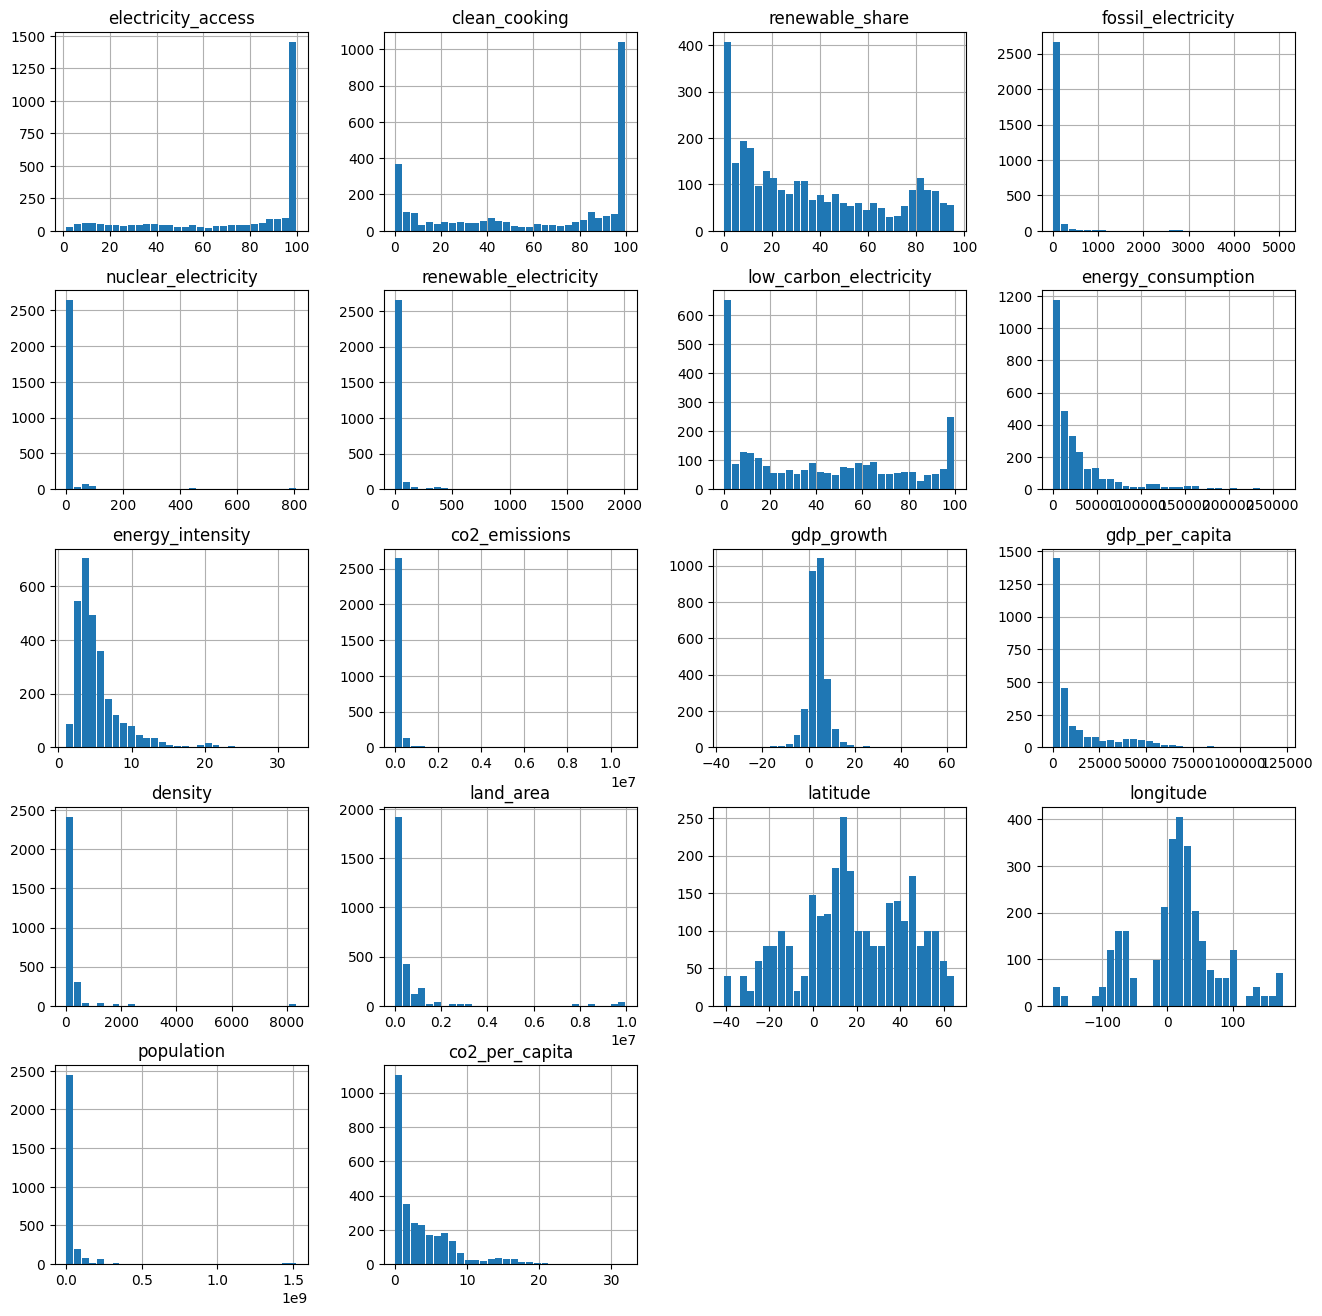

In [26]:
# Distribution of numerical data

num_data = energy_data_cleaned.drop(['country', 'year', 'continent'], axis=1)
num_data.hist(bins=30, figsize=(16,16), rwidth=0.9, zorder=2)
plt.show()

- Calculated features' correlations with the target variable and removed irrelevant ones

In [27]:
# Correlations with the target variable
correlation_target = abs(energy_data_cleaned.corr()['co2_per_capita'])
correlation_target

country                   0.019906
year                      0.045145
electricity_access        0.545558
clean_cooking             0.638107
renewable_share           0.597590
fossil_electricity        0.225606
nuclear_electricity       0.263819
renewable_electricity     0.186971
low_carbon_electricity    0.269888
energy_consumption        0.837824
energy_intensity          0.072716
co2_emissions             0.205970
gdp_growth                0.098179
gdp_per_capita            0.707977
density                   0.111407
land_area                 0.224519
latitude                  0.405960
longitude                 0.064990
population                0.006148
co2_per_capita            1.000000
continent                 0.159403
Name: co2_per_capita, dtype: float64

In [28]:
# Removing irrelevant features
irrelevant_features = correlation_target[correlation_target < 0.15]
energy_featured = energy_data_cleaned.drop(irrelevant_features.to_dict().keys(), axis=1)

- Drop some features that highly correlate with each other to avoid multicollinearity

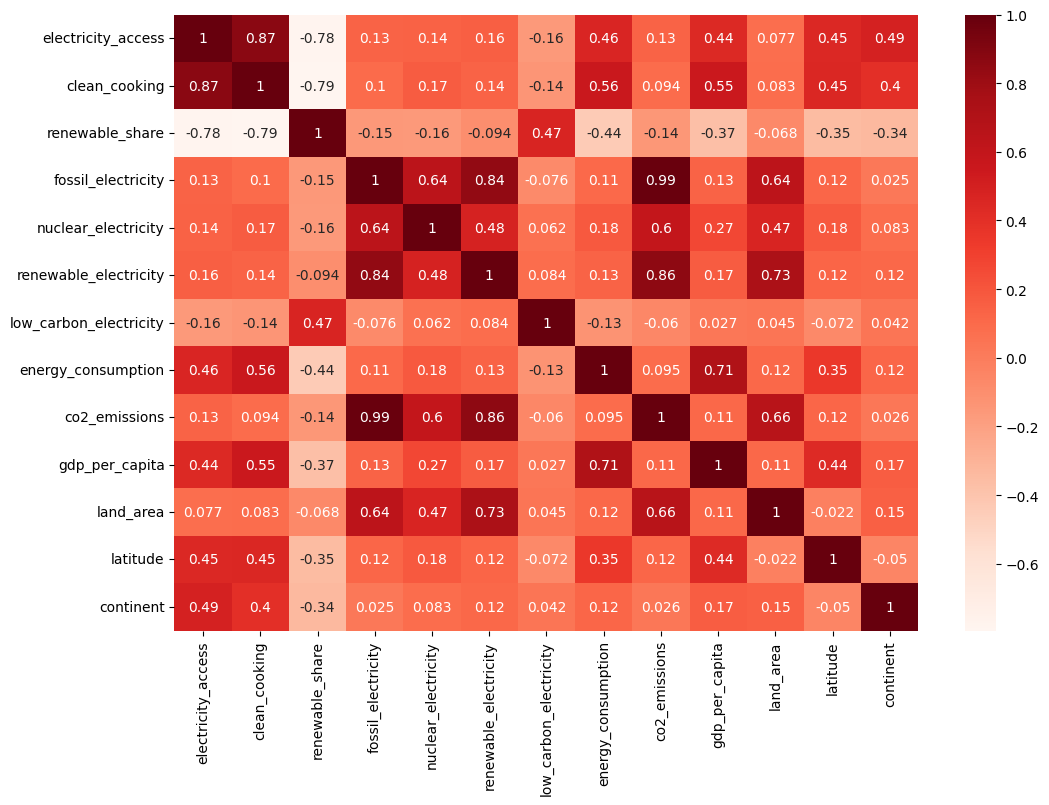

In [29]:
# Heatmap of correlations between predictors
plt.figure(figsize=(12,8))
sns.heatmap(energy_featured.drop(columns = 'co2_per_capita').corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [50]:
# Drop redundant columns
energy_featured_relevant = energy_featured.drop(columns = ['low_carbon_electricity', 'gdp_per_capita', 'electricity_access', 'clean_cooking', 'co2_emissions'])

In [31]:
energy_featured_relevant.head()

,renewable_share,fossil_electricity,nuclear_electricity,renewable_electricity,energy_consumption,land_area,latitude,co2_per_capita,continent
3,36.66,0.31,0.0,0.63,229.96822,652230.0,33.93911,0.031175,1
4,44.24,0.33,0.0,0.56,204.23125,652230.0,33.93911,0.026320,1
5,33.88,0.34,0.0,0.59,252.06912,652230.0,33.93911,0.039608,1
6,31.89,0.20,0.0,0.64,304.42090,652230.0,33.93911,0.044974,1
7,28.78,0.20,0.0,0.75,354.27990,652230.0,33.93911,0.045229,1


### **Modeling**

### Splitting and scaling the data

In [51]:
# Select predictors and target variable
X = energy_featured_relevant.drop(['co2_per_capita'], axis = 1)
Y = energy_featured_relevant['co2_per_capita']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

# Scaling the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

### Linear Regression

In [55]:
# Fitting the model
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)

# Make predictions 
prediction_lin = reg.predict(X_test_scaled)
prediction_lin = np.clip(prediction_lin, a_min=0, a_max=None)

# Estimate the model's performance
mae = metrics.mean_absolute_error(y_test, prediction_lin)
mae_med = metrics.median_absolute_error(y_test, prediction_lin)
mse = metrics.mean_squared_error(y_test, prediction_lin)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, prediction_lin)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Median Absolute Error (MAE, median): {mae_med}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 1.203866679915798
Median Absolute Error (MAE, median): 0.6839730756876343
Mean Squared Error (MSE): 4.048635198983379
Root Mean Squared Error (RMSE): 2.012122063639127
R² Score: 0.7918845092053062


In [57]:
# Make a plot for comparison of predicted and actual values of co2 emissions
fig = px.scatter(x=y_test,
                 y=prediction_lin,
                 title='Actual vs. Predicted CO2 emissions per capita - <b>Linear Regression</b>',
                 opacity = 0.7,
                 trendline='ols', 
                 trendline_color_override='darkblue')

fig.update_layout(xaxis_title="Actual",
                  yaxis_title="Predicted")
fig.show()

### Random Forest Regression

In [56]:
# Fitting Random Forest Regression to the dataset
reg_rf = RandomForestRegressor(random_state=42)
reg_rf.fit(X_train_scaled, y_train)
 
# Making predictions
prediction_rf = reg_rf.predict(X_test_scaled)
prediction_rf = np.clip(prediction_rf, a_min=0, a_max=None)

# Estimate the model's performance
mae_rf = metrics.mean_absolute_error(y_test, prediction_rf)
mae_med_rf = metrics.median_absolute_error(y_test, prediction_rf)
mse_rf = metrics.mean_squared_error(y_test, prediction_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = metrics.r2_score(y_test, prediction_rf)

print(f'Mean Absolute Error (MAE): {mae_rf}')
print(f'Median Absolute Error (MAE, median): {mae_med_rf}')
print(f'Mean Squared Error (MSE): {mse_rf}')
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')
print(f'R² Score: {r2_rf}')

Mean Absolute Error (MAE): 0.20022504650289213
Median Absolute Error (MAE, median): 0.06880746184925701
Mean Squared Error (MSE): 0.3292316622798887
Root Mean Squared Error (RMSE): 0.5737871227902285
R² Score: 0.98307622059954


In [58]:
# Make a plot for comparison of predicted and actual values of emissions
fig = px.scatter(x=y_test,
                 y=prediction_rf,
                 title='Actual vs. Predicted CO2 emissions per capita - <b>Random Forest Regression</b>',
                 opacity = 0.7,
                 trendline='ols', 
                 trendline_color_override='darkblue')

fig.update_layout(xaxis_title="Actual",
                  yaxis_title="Predicted")
fig.show()

### Gradient Boosting Regression

In [59]:
# Create and train the GradientBoostingRegressor model
reg_grad = GradientBoostingRegressor(random_state=42)
reg_grad.fit(X_train_scaled, y_train)

# Make predictions
prediction_grad = reg_grad.predict(X_test_scaled)
prediction_grad = np.clip(prediction_grad, a_min=0, a_max=None)

# Estimate the model's performance
mae_grad = metrics.mean_absolute_error(y_test, prediction_grad)
mae_med_grad = metrics.median_absolute_error(y_test, prediction_grad)
mse_grad = metrics.mean_squared_error(y_test, prediction_grad)
rmse_grad = np.sqrt(mse_grad)
r2_grad = metrics.r2_score(y_test, prediction_grad)

print(f'Mean Absolute Error (MAE): {mae_grad}')
print(f'Median Absolute Error (MAE, median): {mae_med_grad}')
print(f'Mean Squared Error (MSE): {mse_grad}')
print(f'Root Mean Squared Error (RMSE): {rmse_grad}')
print(f'R² Score: {r2_grad}')

Mean Absolute Error (MAE): 0.3990647800975243
Median Absolute Error (MAE, median): 0.192415730831095
Mean Squared Error (MSE): 0.5806858313962905
Root Mean Squared Error (RMSE): 0.7620274479284131
R² Score: 0.9701505048345899


In [60]:
# Make a plot for comparison of predicted and actual values of emissions
fig = px.scatter(x=y_test,
                 y=prediction_grad,
                 title='Actual vs. Predicted CO2 emissions per capita - <b>Gradient Boosting Regression</b>',
                 opacity = 0.7,
                 trendline='ols', 
                 trendline_color_override='darkblue')

fig.update_layout(xaxis_title="Actual",
                  yaxis_title="Predicted")
fig.show()

### K Neighbors Regression

In [61]:
# Create and train the KNeighborsRegressor model
reg_knn = KNeighborsRegressor()
reg_knn.fit(X_train_scaled, y_train)

# Make predictions
prediction_knn = reg_knn.predict(X_test_scaled)
prediction_knn = np.clip(prediction_knn, a_min=0, a_max=None)

# Estimate the model's performance
mae_knn = metrics.mean_absolute_error(y_test, prediction_knn)
mae_med_knn = metrics.median_absolute_error(y_test, prediction_knn)
mse_knn = metrics.mean_squared_error(y_test, prediction_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = metrics.r2_score(y_test, prediction_knn)

print(f'Mean Absolute Error (MAE): {mae_knn}')
print(f'Median Absolute Error (MAE, median): {mae_med_knn}')
print(f'Mean Squared Error (MSE): {mse_knn}')
print(f'Root Mean Squared Error (RMSE): {rmse_knn}')
print(f'R² Score: {r2_knn}')

Mean Absolute Error (MAE): 0.2763774780736378
Median Absolute Error (MAE, median): 0.0893059465954904
Mean Squared Error (MSE): 0.6801969194936927
Root Mean Squared Error (RMSE): 0.8247405164618097
R² Score: 0.965035250453532


In [62]:
# Make a plot for comparison of predicted and actual values of emissions
fig = px.scatter(x=y_test,
                 y=prediction_knn,
                 title='Actual vs. Predicted CO2 emissions per capita - <b>K Neighbors Regression</b>',
                 opacity = 0.7,
                 trendline='ols', 
                 trendline_color_override='darkblue')

fig.update_layout(xaxis_title="Actual",
                  yaxis_title="Predicted")
fig.show()

### XGBoost Regression

In [63]:
# Create and train the XGBoost Regression model
reg_xgb = xgb.XGBRegressor()
reg_xgb.fit(X_train_scaled, y_train)

# Make predictions
prediction_xgb = reg_xgb.predict(X_test_scaled)
prediction_xgb = np.clip(prediction_xgb, a_min=0, a_max=None)

# Estimate the model's performance
mae_xgb = metrics.mean_absolute_error(y_test, prediction_xgb)
mae_med_xgb = metrics.median_absolute_error(y_test, prediction_xgb)
mse_xgb = metrics.mean_squared_error(y_test, prediction_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = metrics.r2_score(y_test, prediction_xgb)

print(f'Mean Absolute Error (MAE): {mae_xgb}')
print(f'Median Absolute Error (MAE, median): {mae_med_xgb}')
print(f'Mean Squared Error (MSE): {mse_xgb}')
print(f'Root Mean Squared Error (RMSE): {rmse_xgb}')
print(f'R² Score: {r2_xgb}')

Mean Absolute Error (MAE): 0.2403217462208053
Median Absolute Error (MAE, median): 0.0779347737137508
Mean Squared Error (MSE): 0.4236396714001996
Root Mean Squared Error (RMSE): 0.6508760799109148
R² Score: 0.9782232841932279


In [64]:
# Make a plot for comparison of predicted and actual values of emissions
fig = px.scatter(x=y_test,
                 y=prediction_xgb,
                 title='Actual vs. Predicted CO2 emissions per capita - <b>XGBoost Regression</b>',
                 opacity = 0.7,
                 trendline='ols', 
                 trendline_color_override='darkblue')

fig.update_layout(xaxis_title="Actual",
                  yaxis_title="Predicted")
fig.show()

### Model selection

In [65]:
# Create a data frame of models' performance metrics
metrics = {
    'Model': ['Linear Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'K Neighbors Regression', 'XGBoost Regression'],
    'Mean Absolute Error': [round(mae, 4), round(mae_rf, 4), round(mae_grad, 4), round(mae_knn, 4), round(mae_xgb, 4)],
    'Median Absolute Error': [round(mae_med, 4), round(mae_med_rf, 4), round(mae_med_grad, 4), round(mae_med_knn, 4), round(mae_med_xgb, 4)],
    'Mean Squared Error': [round(mse, 4), round(mse_rf, 4), round(mse_grad, 4), round(mse_knn, 4), round(mse_xgb, 4)],
    'Root Mean Squared Error': [round(rmse, 4), round(rmse_rf, 4), round(rmse_grad, 4), round(rmse_knn, 4), round(rmse_xgb, 4)],
    'R² Score': [round(r2, 4), round(r2_rf, 4), round(r2_grad, 4), round(r2_knn, 4), round(r2_xgb, 4)]
}
 
df = pd.DataFrame(metrics)
df

,Model,Mean Absolute Error,Median Absolute Error,Mean Squared Error,Root Mean Squared Error,R² Score
0,Linear Regression,1.2039,0.6840,4.0486,2.0121,0.7919
1,Random Forest Regression,0.2002,0.0688,0.3292,0.5738,0.9831
2,Gradient Boosting Regression,0.3991,0.1924,0.5807,0.7620,0.9702
3,K Neighbors Regression,0.2764,0.0893,0.6802,0.8247,0.9650
4,XGBoost Regression,0.2403,0.0779,0.4236,0.6509,0.9782


## **Conclusion:**

In this project, the dataset with global data on sustaitable energy over 20 years period was analyzed. The worldwide energy market was explored, and particularly the energy market of the European Union was analyzed in detail.

1. In China and India, renewable energy production dramatically increased since 2000 to 2020, more than in Europe or America during the same period.

2. Fossil fuel production results in high amount of CO2 emissions. The greater the share of renewables in energy production, the less greenhouse gases a country produces.

3. Most countries are still heavily dependent on fossil fuels, although the renewable energy production is increasing.

4. Generally the higher the GDP per capita, the more CO2 emissions per capita this country produces. Countries with the highest CO2 emission amount per capita: Eastern Arabia (Qatar, Saudi Arabia, Kuwait, Bahrain), the USA, Canada and Australia.

5. Eastern European countries produce significantly less renewable energy than Western Europe.

6. Over 20 years, the amount of renewable energy production substantially increased in the EU, while that of fossil fuels and nuclear energy decreased.

7. Northern European countries (Finland, Estonia, Sweden) are ones of the most efficient energy consumers and have one of the largest shares of renewable energy in overall domestic consumption.

Regarding investments in green technologies in the EU, countries in Eastern Europe can be promising in terms of their growing economy, a high GDP per capita and increasing share of renewable energy in total consumption.

<br/>

In the **modeling** part, I tried to predict the amount of **CO2 emissions per capita** by implementing Machine Learning models. 

- The data was firstly cleaned of missing values and redundancy, and categorical variables were encoded into numeric. Then Feature Engineering was applied to avoid multicollinearity and improve the model accuracy by removing features that highly correlated with each other. The following features were selected as predictors: *'renewable_share', 'fossil_electricity', 'nuclear_electricity', 'renewable_electricity', 'energy_consumption', 'land_area', 'latitude', 'continent'*.

- Finally, the features were scaled, and 5 different Machine Learning models were trained and evaluated: Linear Regression, Random Forest Regression, Gradient Boosting Regression, K Neighbors Regression, XGBoost Regression. All hyperparameters were set as default. Based on the evaluation metrics, **Random Forest Regression** outperformed others and demonstrated the lowest error and the highest prediction accuracy. 

**In conclusion**, as the issue of energy transition and climate change is becoming increasingly important on the world agenda, it is crucial to utilize tools that could help with analyzing the vast amount of data and forecasting CO2 emissions and energy consumption. In this project, I provided meaningful insights on the global energy market using data analysis and visualization libraries. I also created and evaluated machine learning models predicting the amount of CO2 emissions per capita that could be used to take preventative measures against environmental pollution. 